In [1]:
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
import example_deeper
import certa.metrics

In [3]:
n_tuples = 20
n_triangles = [5, 8, 20, 40, 50]
#with higher values makes the thresholds (theta_min, theta_max) stricter
threshold_tuning = -2

tests = {
    "cosine" : example_deeper.run(certa.metrics.get_cosine, n_tuples, n_triangles),
    "euclidean" : example_deeper.run(certa.metrics.euclidean_distance, n_tuples, n_triangles),
    "manhattan" : example_deeper.run(certa.metrics.manhattan_distance, n_tuples, n_triangles),
    "mahalanobis" : example_deeper.run(certa.metrics.mahalanobis_distance, n_tuples, n_triangles),
    "jaccard" : example_deeper.run(certa.metrics.jaccard_similarity, n_tuples, n_triangles),
}

In [4]:
tests_results = {}
for test_name, test in tests.items():
    print("Starting test for:", test_name)
    results = []
    for mean, impact, _, _ in test:
        result = mean, impact
        print(result)
        results.append(result)
    tests_results[test_name] = results

Starting test for: cosine
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tupla_A (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Tupla_B (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Embedding_lookup (Embedding)    (None, None, 50)     20000100    Tupla_A[0][0]                    
                                                                 Tupla_B[0][0]                    
Total params: 20,000,100
Trainable params: 0
Non-trainable params: 20,000,100
_________________________________________________________________________________________

100%|██████████| 5/5 [00:00<00:00,  5.19it/s]
0it [00:00, ?it/s]
100%|██████████| 4/4 [00:00<00:00,  6.32it/s]
0it [00:00, ?it/s]
100%|██████████| 5/5 [00:00<00:00,  6.29it/s]


nt: 5 
# of unsuccessful pairs: 0 / 20
(0.01282051282051282, 0.01282051282051282)


100%|██████████| 8/8 [00:01<00:00,  6.26it/s]
0it [00:00, ?it/s]
100%|██████████| 8/8 [00:01<00:00,  6.23it/s]
0it [00:00, ?it/s]
100%|██████████| 8/8 [00:01<00:00,  6.46it/s]


nt: 8 
# of unsuccessful pairs: 0 / 20
(0.013157894736842105, 0.013157894736842105)


100%|██████████| 20/20 [00:02<00:00,  7.14it/s]
0it [00:00, ?it/s]
100%|██████████| 20/20 [00:02<00:00,  8.03it/s]


nt: 20 
# of unsuccessful pairs: 0 / 20
(0.01293103448275862, 0.01293103448275862)


100%|██████████| 40/40 [00:04<00:00,  8.79it/s]


nt: 40 
# of unsuccessful pairs: 0 / 20
(0.013333333333333334, 0.013333333333333334)


100%|██████████| 46/46 [00:05<00:00,  8.97it/s]
0it [00:00, ?it/s]
100%|██████████| 50/50 [00:05<00:00,  8.96it/s]


nt: 50 
# of unsuccessful pairs: 0 / 20
(0.01366120218579235, 0.01639344262295082)
Starting test for: euclidean
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tupla_A (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Tupla_B (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Embedding_lookup (Embedding)    (None, None, 50)     20000100    Tupla_A[0][0]                    
                                                                 Tupla_B[0][0]                    
Total params: 20,000,100
Trainable params: 0
Non-trainable params: 20,000,100
_

100%|██████████| 2/2 [00:00<00:00,  8.85it/s]


nt: 5 
# of unsuccessful pairs: 0 / 20
(0.0, 0.05434782608695652)


100%|██████████| 3/3 [00:00<00:00, 10.19it/s]


nt: 8 
# of unsuccessful pairs: 0 / 20
(0.006329113924050633, 0.04430379746835443)


100%|██████████| 9/9 [00:00<00:00,  9.20it/s]


nt: 20 
# of unsuccessful pairs: 0 / 20
(0.009259259259259259, 0.046296296296296294)


100%|██████████| 19/19 [00:02<00:00,  8.07it/s]


nt: 40 
# of unsuccessful pairs: 0 / 20
(0.007352941176470588, 0.04779411764705882)


100%|██████████| 28/28 [00:03<00:00,  7.52it/s]


nt: 50 
# of unsuccessful pairs: 0 / 20
(0.00909090909090909, 0.048484848484848485)
Starting test for: manhattan
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tupla_A (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Tupla_B (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Embedding_lookup (Embedding)    (None, None, 50)     20000100    Tupla_A[0][0]                    
                                                                 Tupla_B[0][0]                    
Total params: 20,000,100
Trainable params: 0
Non-trainable params: 20,000,100


100%|██████████| 4/4 [00:00<00:00,  9.05it/s]
0it [00:00, ?it/s]
100%|██████████| 2/2 [00:00<00:00,  7.72it/s]


nt: 5 
# of unsuccessful pairs: 0 / 20
(0.0, 0.0)


100%|██████████| 2/2 [00:00<00:00,  6.08it/s]


nt: 8 
# of unsuccessful pairs: 0 / 20
(0.0, 0.019736842105263157)


100%|██████████| 10/10 [00:01<00:00,  7.60it/s]


nt: 20 
# of unsuccessful pairs: 0 / 20
(0.004629629629629629, 0.032407407407407406)


100%|██████████| 18/18 [00:02<00:00,  6.50it/s]


nt: 40 
# of unsuccessful pairs: 0 / 20
(0.007575757575757576, 0.03409090909090909)


100%|██████████| 20/20 [00:02<00:00,  7.64it/s]


nt: 50 
# of unsuccessful pairs: 0 / 20
(0.009316770186335404, 0.034161490683229816)
Starting test for: mahalanobis
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tupla_A (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Tupla_B (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Embedding_lookup (Embedding)    (None, None, 50)     20000100    Tupla_A[0][0]                    
                                                                 Tupla_B[0][0]                    
Total params: 20,000,100
Trainable params: 0
Non-trainable params: 20,000,1

100%|██████████| 4/4 [00:00<00:00,  9.25it/s]
0it [00:00, ?it/s]
100%|██████████| 3/3 [00:00<00:00,  7.54it/s]


nt: 5 
# of unsuccessful pairs: 0 / 20
(0.0, 0.011627906976744186)


100%|██████████| 6/6 [00:00<00:00,  6.69it/s]


nt: 8 
# of unsuccessful pairs: 0 / 20
(0.0, 0.011764705882352941)


100%|██████████| 9/9 [00:01<00:00,  7.24it/s]


nt: 20 
# of unsuccessful pairs: 0 / 20
(0.004310344827586207, 0.021551724137931036)


100%|██████████| 21/21 [00:02<00:00,  7.45it/s]


nt: 40 
# of unsuccessful pairs: 0 / 20
(0.0070921985815602835, 0.024822695035460994)


100%|██████████| 27/27 [00:03<00:00,  8.36it/s]


nt: 50 
# of unsuccessful pairs: 0 / 20
(0.008982035928143712, 0.029940119760479042)
Starting test for: jaccard
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tupla_A (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Tupla_B (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Embedding_lookup (Embedding)    (None, None, 50)     20000100    Tupla_A[0][0]                    
                                                                 Tupla_B[0][0]                    
Total params: 20,000,100
Trainable params: 0
Non-trainable params: 20,000,100
_

100%|██████████| 2/2 [00:00<00:00,  9.47it/s]
0it [00:00, ?it/s]
100%|██████████| 2/2 [00:00<00:00,  7.80it/s]
0it [00:00, ?it/s]
100%|██████████| 5/5 [00:00<00:00,  8.41it/s]


nt: 5 
# of unsuccessful pairs: 0 / 20
(0.027777777777777776, 0.027777777777777776)


100%|██████████| 8/8 [00:00<00:00,  8.59it/s]


nt: 8 
# of unsuccessful pairs: 0 / 20
(0.018518518518518517, 0.018518518518518517)


100%|██████████| 20/20 [00:02<00:00,  8.25it/s]


nt: 20 
# of unsuccessful pairs: 0 / 20
(0.017094017094017096, 0.02564102564102564)


100%|██████████| 39/39 [00:04<00:00,  7.80it/s]


nt: 40 
# of unsuccessful pairs: 0 / 20
(0.017241379310344827, 0.03103448275862069)


100%|██████████| 46/46 [00:05<00:00,  8.16it/s]


nt: 50 
# of unsuccessful pairs: 0 / 20
(0.017543859649122806, 0.03216374269005848)


In [5]:
tests_results

{'cosine': [(0.01282051282051282, 0.01282051282051282),
  (0.013157894736842105, 0.013157894736842105),
  (0.01293103448275862, 0.01293103448275862),
  (0.013333333333333334, 0.013333333333333334),
  (0.01366120218579235, 0.01639344262295082)],
 'euclidean': [(0.0, 0.05434782608695652),
  (0.006329113924050633, 0.04430379746835443),
  (0.009259259259259259, 0.046296296296296294),
  (0.007352941176470588, 0.04779411764705882),
  (0.00909090909090909, 0.048484848484848485)],
 'manhattan': [(0.0, 0.0),
  (0.0, 0.019736842105263157),
  (0.004629629629629629, 0.032407407407407406),
  (0.007575757575757576, 0.03409090909090909),
  (0.009316770186335404, 0.034161490683229816)],
 'mahalanobis': [(0.0, 0.011627906976744186),
  (0.0, 0.011764705882352941),
  (0.004310344827586207, 0.021551724137931036),
  (0.0070921985815602835, 0.024822695035460994),
  (0.008982035928143712, 0.029940119760479042)],
 'jaccard': [(0.027777777777777776, 0.027777777777777776),
  (0.018518518518518517, 0.01851851851

In [6]:
#utility functions


to_feature_index = {
    "mean_drop": 0, 
    "impact": 1
}

'''
extracts single feature from the results of a single metric test based on the name

example: 

results = [(1, 2), (0, 50)]
feature_name = "mean_drop"

output = [1, 0]
'''
def get_feature(results, feature_name):
    feature_name = feature_name.lower()
    feature_index = to_feature_index[feature_name]
    feature_results = []
    for result in results:
        feature_results.append(result[feature_index])
    return feature_results


def get_mean_drops(results):
    return get_feature(results, "mean_drop")
    
def get_impacts(results):
    return get_feature(results, "impact")


def plot_results(mean_metrics_results, title): 
    plt.bar(range(len(mean_metrics_results)), list(mean_metrics_results.values()), align='center')
    plt.xticks(range(len(mean_metrics_results)), list(mean_metrics_results.keys()))
    plt.title(title)
    plt.show()
'''
extracts single feature from the results of all the metric tests

example: 

all_results = {
    "cosine": [(20, 10), (-15, 0)],
    "euclidean": [(77, 12), (42, -13)],
}

feature_name = "mean_drop"

output = {
    "cosine": [20, -15],
    "euclidean": [77, 42],
}
'''
def extract_feature(all_results, feature_name):
    all_results_copy = all_results.copy()
    for test_name, results_raw in all_results_copy.items():
        results_filtered = get_feature(results_raw, feature_name)
        all_results_copy[test_name] = results_filtered
    return all_results_copy


def mean_feature(feature_results):
    import statistics
    mean_results = {}
    for test_name, results in feature_results.items():
        mean_results[test_name] = statistics.mean(results)
    return mean_results

In [7]:
extract_feature(tests_results, "mean_drop")

{'cosine': [0.01282051282051282,
  0.013157894736842105,
  0.01293103448275862,
  0.013333333333333334,
  0.01366120218579235],
 'euclidean': [0.0,
  0.006329113924050633,
  0.009259259259259259,
  0.007352941176470588,
  0.00909090909090909],
 'manhattan': [0.0,
  0.0,
  0.004629629629629629,
  0.007575757575757576,
  0.009316770186335404],
 'mahalanobis': [0.0,
  0.0,
  0.004310344827586207,
  0.0070921985815602835,
  0.008982035928143712],
 'jaccard': [0.027777777777777776,
  0.018518518518518517,
  0.017094017094017096,
  0.017241379310344827,
  0.017543859649122806]}

In [8]:
extract_feature(tests_results, "impact")

{'cosine': [0.01282051282051282,
  0.013157894736842105,
  0.01293103448275862,
  0.013333333333333334,
  0.01639344262295082],
 'euclidean': [0.05434782608695652,
  0.04430379746835443,
  0.046296296296296294,
  0.04779411764705882,
  0.048484848484848485],
 'manhattan': [0.0,
  0.019736842105263157,
  0.032407407407407406,
  0.03409090909090909,
  0.034161490683229816],
 'mahalanobis': [0.011627906976744186,
  0.011764705882352941,
  0.021551724137931036,
  0.024822695035460994,
  0.029940119760479042],
 'jaccard': [0.027777777777777776,
  0.018518518518518517,
  0.02564102564102564,
  0.03103448275862069,
  0.03216374269005848]}

In [9]:
drops = extract_feature(tests_results, "mean_drop")
mean_drops = mean_feature(drops)
mean_drops

{'cosine': 0.013180795511847846,
 'euclidean': 0.006406444690137914,
 'manhattan': 0.004304431478344522,
 'mahalanobis': 0.004076915867458041,
 'jaccard': 0.019635110469956203}

In [10]:
impacts = extract_feature(tests_results, "impact")
mean_impacts = mean_feature(impacts)
mean_impacts

{'cosine': 0.01372724359927954,
 'euclidean': 0.04824537719670291,
 'manhattan': 0.024079329857361893,
 'mahalanobis': 0.01994143035859364,
 'jaccard': 0.02702710947720022}

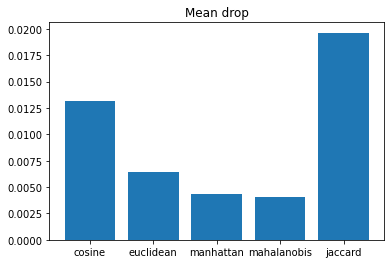

In [11]:
plot_results(mean_drops, "Mean drop")

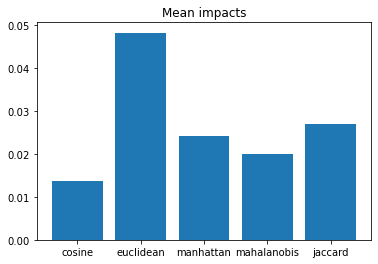

In [12]:
plot_results(mean_impacts, "Mean impacts")

## Save Results

In [13]:
import os
import pandas as pd 

def add_parameter_info(dataframe):
    dataframe = dataframe.copy()
    dataframe["tuples"] = n_tuples
    dataframe["triangles"] = [n_triangles]
    dataframe["threshold"] = threshold_tuning
    return dataframe

def save_benchmark(dataframe, path):
    if os.path.exists(path):
        dataframe.to_csv(path, mode="a", index=False, header=False)
    else:
        dataframe.to_csv(path, mode="a", index=False)

In [14]:
drops_benchmark = pd.DataFrame([mean_drops])
drops_benchmark = add_parameter_info(drops_benchmark)

drops_benchmark

,cosine,euclidean,manhattan,mahalanobis,jaccard,tuples,triangles,threshold
0,0.013181,0.006406,0.004304,0.004077,0.019635,20,"[5, 8, 20, 40, 50]",-2


In [15]:
impacts_benchmark = pd.DataFrame([mean_impacts])
impacts_benchmark = add_parameter_info(impacts_benchmark)

impacts_benchmark

,cosine,euclidean,manhattan,mahalanobis,jaccard,tuples,triangles,threshold
0,0.013727,0.048245,0.024079,0.019941,0.027027,20,"[5, 8, 20, 40, 50]",-2


In [16]:
save_path_drops = "mean_drops_benchmarks.csv"
save_path_impacts = "mean_impacts_benchmark.csv"

save_benchmark(drops_benchmark, save_path_drops)
save_benchmark(impacts_benchmark, save_path_impacts)

In [17]:
pd.read_csv(save_path_drops)

,cosine,euclidean,manhattan,mahalanobis,jaccard,tuples,triangles,threshold
0,0.048978,0.005717,0.030590,0.038539,0.048978,2,"[2, 5]",-2
1,0.039195,0.048223,0.055239,0.058145,0.035861,20,"[8, 30, 50]",-2
2,0.013181,0.006406,0.004304,0.004077,0.019635,20,"[5, 8, 20, 40, 50]",-2


In [18]:
pd.read_csv(save_path_impacts)

,cosine,euclidean,manhattan,mahalanobis,jaccard,tuples,triangles,threshold
0,0.012406,0.035138,0.039286,0.063946,0.041239,20,"[8, 30, 50]",-2
1,0.013727,0.048245,0.024079,0.019941,0.027027,20,"[5, 8, 20, 40, 50]",-2


## Triangles plots

In [39]:
def plot_triangles_trend(metrics_results, metric_measured):
    plt.figure(figsize=(10, 5))
    for metric_name, results in metrics_results.items():
        plt.plot(n_triangles, results)
    plt.legend(metrics_results.keys())
    plt.xlabel("n_triangles")
    plt.ylabel(metric_measured)
    #plt.xticks(range(n_triangles[0], n_triangles[-1] + 1))
    plt.show()

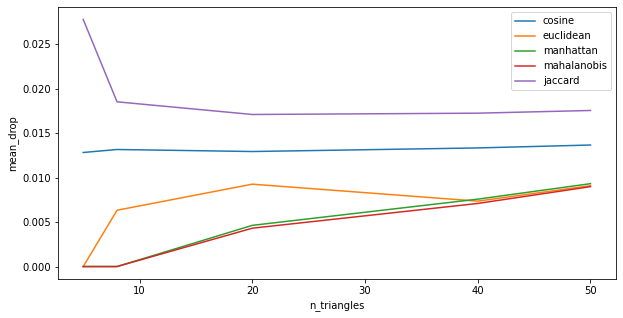

In [40]:
plot_triangles_trend(drops, "mean_drop")

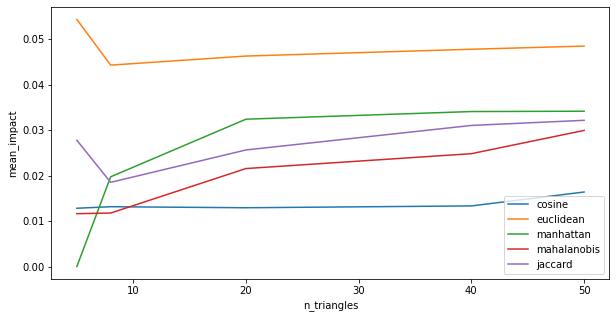

In [41]:
plot_triangles_trend(impacts, "mean_impact")